In [22]:
import torch

2


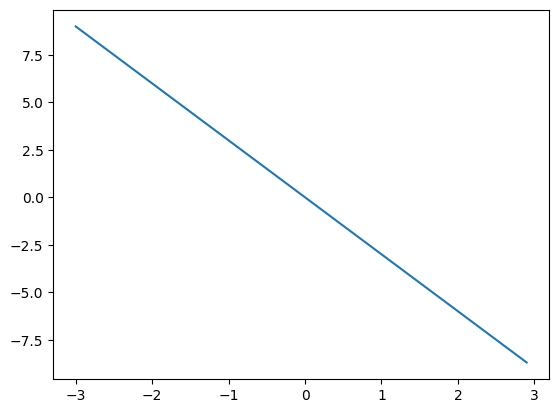

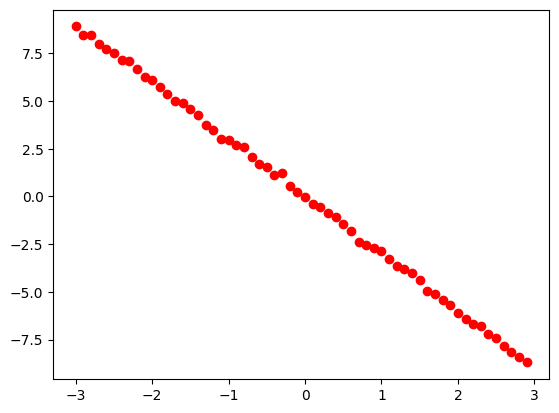

In [23]:
w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

print(X.ndimension())

import matplotlib.pyplot as plt

plt.plot(X.numpy(), f.numpy())
plt.show()

Y = f + 0.1 * torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [24]:
def forward(x):
    return w * x

def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

In [25]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()
       
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
  
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [26]:
lr = 0.1
LOSS = []
"""for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward()

    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()
"""

'for epoch in range(4):\n    Yhat = forward(X)\n    loss = criterion(Yhat, Y)\n    loss.backward()\n\n    w.data = w.data - lr * w.grad.data\n    w.grad.data.zero_()\n'

In [27]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<class 'numpy.ndarray'>


In [28]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

/tmp/ipykernel_3472242/3839385611.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


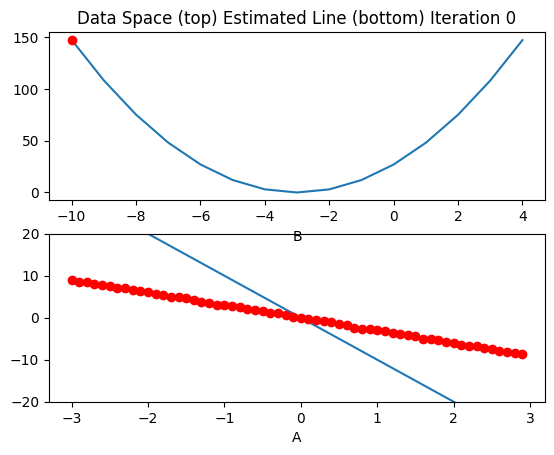

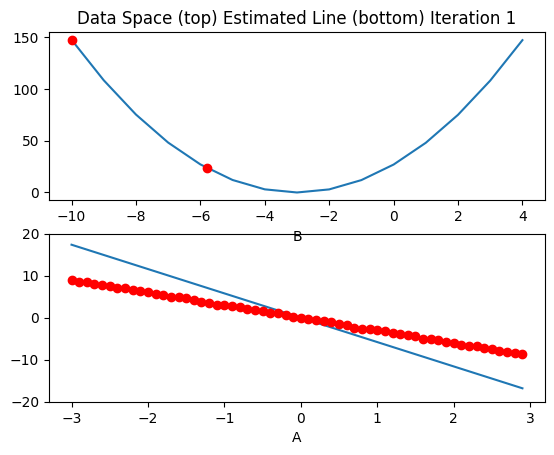

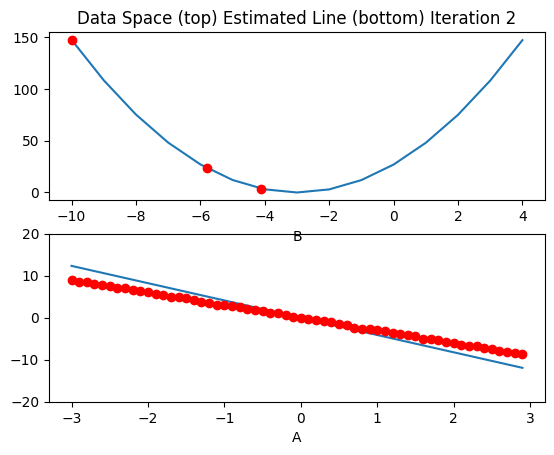

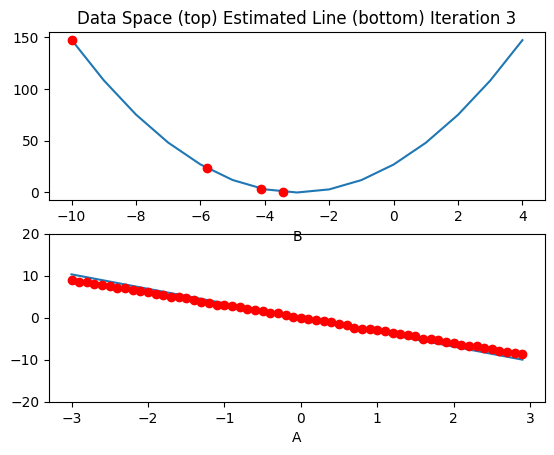

<Figure size 640x480 with 0 Axes>

In [29]:
train_model(4)

Text(38.347222222222214, 0.5, 'Cost')

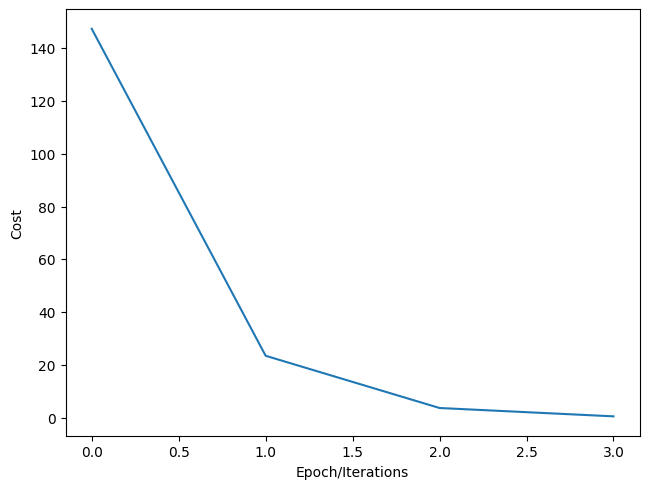

In [30]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")